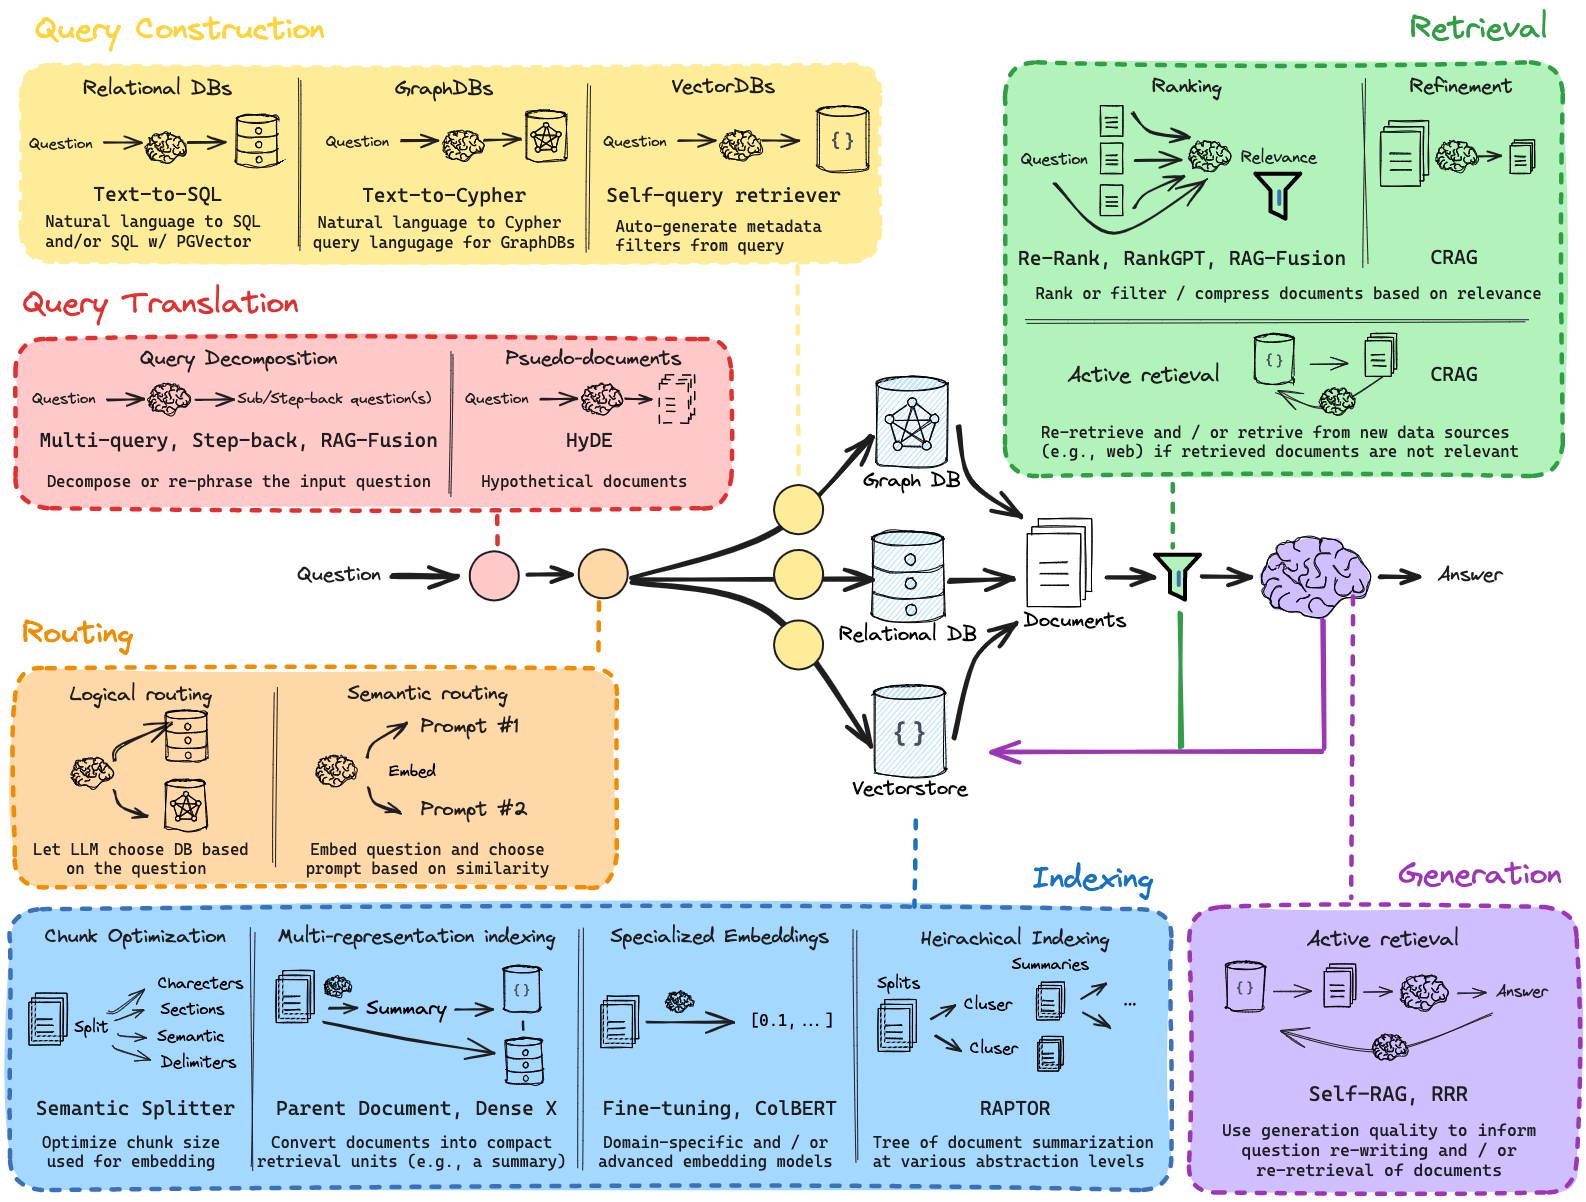

To master **Retrieval-Augmented Generation (RAG)** using LangChain, a structured learning path can be highly beneficial. Below is a comprehensive syllabus designed to guide you through the essential concepts and practical implementations:

---

### 1. **Introduction to Retrieval-Augmented Generation (RAG)**

- **Concepts:**
  - Understanding the limitations of standalone Large Language Models (LLMs).
  - The role of external data retrieval in enhancing LLM responses.
  - Overview of the RAG architecture and its components.

- **Resources:**
  - [Retrieval augmented generation (RAG) - LangChain Documentation](https://python.langchain.com/docs/concepts/rag/)

---

### 2. **Fundamentals of LangChain**

- **Concepts:**
  - Introduction to LangChain and its capabilities.
  - Core components: Models, Prompts, Parsers, and Chains.
  - Integrating LangChain with various data sources and APIs.

- **Resources:**
  - [LangChain for LLM Application Development - DeepLearning.AI](https://www.deeplearning.ai/short-courses/langchain-for-llm-application-development/)

---

### 3. **Building a Basic RAG Application with LangChain**

- **Concepts:**
  - Setting up the development environment.
  - Loading and preprocessing textual data.
  - Implementing a simple Q&A system using LangChain.

- **Practical Exercise:**
  - Develop a basic RAG application that answers questions based on a provided text corpus.

- **Resources:**
  - [Build a Retrieval Augmented Generation (RAG) App: Part 1](https://python.langchain.com/docs/tutorials/rag/)

---

### 4. **Advanced RAG Techniques**

- **Concepts:**
  - Enhancing retrieval accuracy with advanced indexing methods.
  - Implementing semantic search and vector databases.
  - Reducing hallucinations in AI outputs and improving response reliability.

- **Practical Exercise:**
  - Integrate a vector database like FAISS or Weaviate to improve document retrieval.

- **Resources:**
  - [Retrieval Augmented Generation LlamaIndex & LangChain Course](https://learn.activeloop.ai/courses/rag)

---

### 5. **Integrating External Data Sources**

- **Concepts:**
  - Connecting LangChain applications to APIs and external databases.
  - Handling unstructured data from various formats (PDFs, CSVs, etc.).
  - Ensuring data privacy and security during retrieval.

- **Practical Exercise:**
  - Build a RAG system that retrieves and utilizes information from live web sources.

- **Resources:**
  - [Retrieval Augmented Generation (RAG) with LangChain - DataCamp](https://www.datacamp.com/courses/retrieval-augmented-generation-rag-with-langchain)

---

### 6. **Optimizing and Evaluating RAG Systems**

- **Concepts:**
  - Techniques for evaluating the performance of RAG applications.
  - Implementing feedback loops for continuous improvement.
  - Balancing response generation speed and accuracy.

- **Practical Exercise:**
  - Set up evaluation metrics and conduct performance testing on your RAG application.

- **Resources:**
  - [Advanced LangChain Techniques: Mastering RAG Applications](https://www.udemy.com/course/advanced-langchain-techniques-mastering-rag-applications/)

---

### 7. **Deploying RAG Applications**

- **Concepts:**
  - Preparing RAG systems for production environments.
  - Scalability considerations and cloud deployment options.
  - Monitoring and maintaining deployed applications.

- **Practical Exercise:**
  - Deploy your RAG application using a platform like Streamlit or Flask.

- **Resources:**
  - [LangChain: Chat with Your Data - DeepLearning.AI](https://www.deeplearning.ai/short-courses/langchain-chat-with-your-data/)

---

### 8. **Case Studies and Real-World Applications**

- **Concepts:**
  - Exploring industry use cases of RAG systems.
  - Lessons learned from deploying RAG in production.
  - Future trends and developments in RAG technology.

- **Resources:**
  - [Retrieval Augmented Generation for LLM Bots with LangChain](https://www.activeloop.ai/resources/retrieval-augmented-generation-for-llm-bots-with-lang-chain/)

---



## Overview 

In [ ]:
## important packages
! pip install  langchain_community langchainhub chromadb  langchain-huggingface

In [74]:
#check the setup 
import os 
from dotenv import load_dotenv
from langchain_groq import ChatGroq
from langchain_google_genai import ChatGoogleGenerativeAI
load_dotenv()

#API key for Groq
api_key = os.getenv("GOOGLE_API_KEY")

#model init
LLM=ChatGoogleGenerativeAI(
    api_key=api_key,
    model="gemini-2.0-flash-001",
    temperature=0.5,
)

#response from MOdel like llama model , Deepseek R1, etc.
response=LLM.invoke("hi")

# just Print the messages from AI and Dissplay
print(f'AI messages:{response.content}')

AI messages:Hi there! How can I help you today?


![Screenshot 2025-04-05 205638.png](<attachment:Screenshot 2025-04-05 205638.png>)
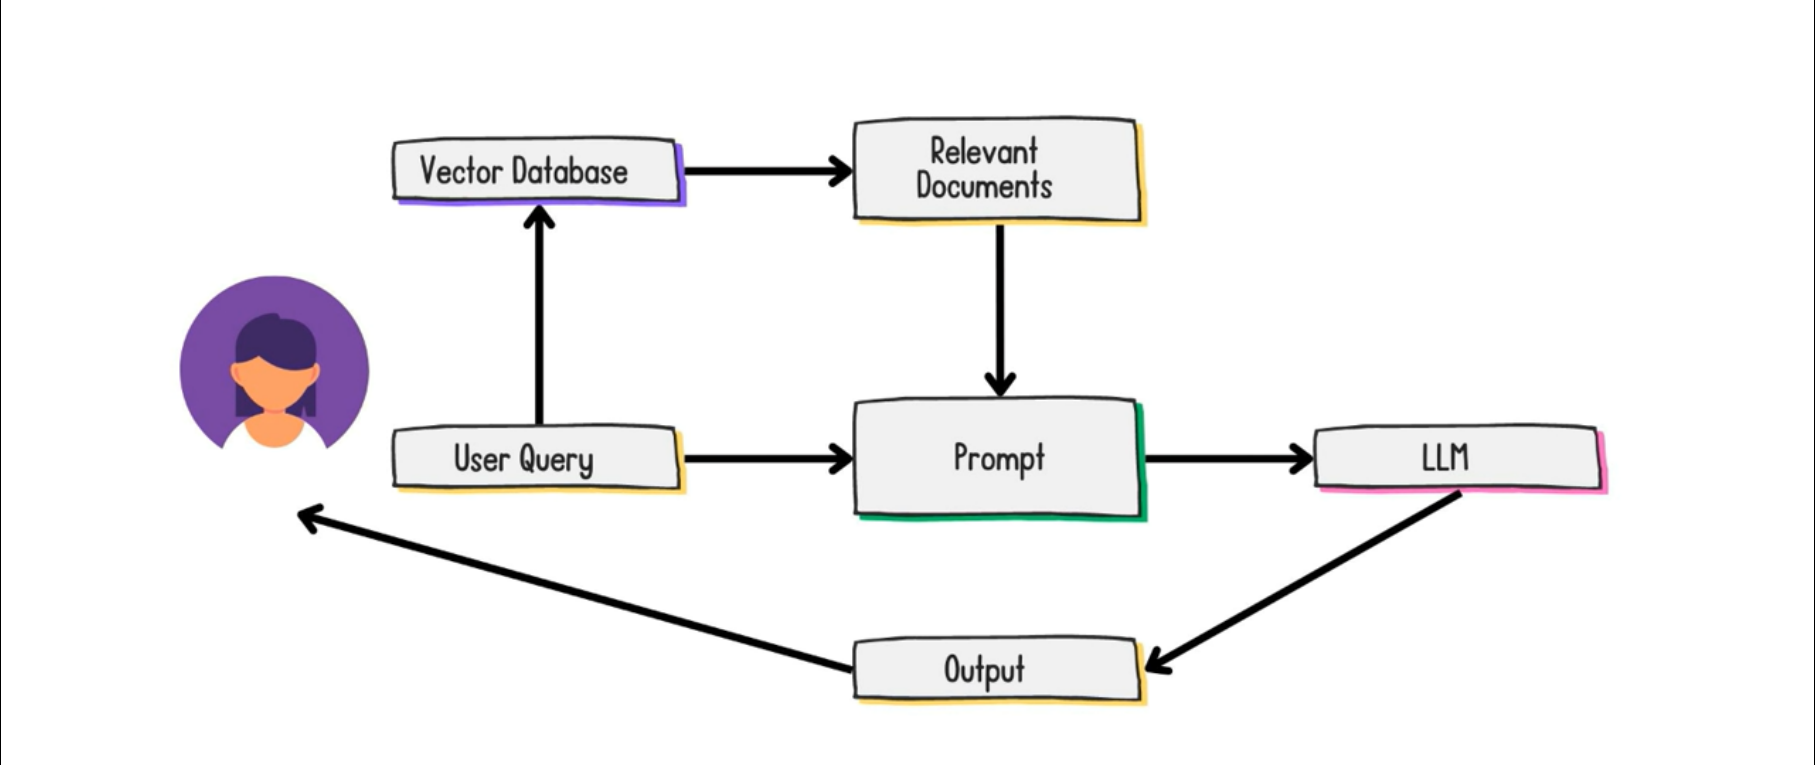

# Quickstart RAG
## ( Retrival Augmented Generation)

In [9]:
#import important liberay
import bs4 
#prebulid prompt
from langchain import hub
# chunking the sentence for efficient model can process easly
from langchain.text_splitter import RecursiveCharacterTextSplitter
# webbaseloader load any wedpage content
from langchain_community.document_loaders import WebBaseLoader
# vectorestores likes fassi,chroma in memeory database
from langchain_community.vectorstores import Chroma
#handling of outputs from language models (LLMs) by converting them into a straightforward string forma
from langchain_core.output_parsers import StrOutputParser
# RunnablePassthrough class in LangChain serves as a utility that forwards its input directly to its output without modification, effectively acting as an identity function.
from langchain_core.runnables import RunnablePassthrough
#model init already Done
# from langchain_groq import ChatGroq 
from langchain_community.embeddings import HuggingFaceEmbeddings




# Indexing 
loader = WebBaseLoader(
    web_paths=("https://python.langchain.com/docs/how_to/document_loader_web/",), #raw html page
    
    )


#load the doc
doc=loader.load() #load format is list use for loop display


#split

text_splitter=RecursiveCharacterTextSplitter(chunk_size=1000,chunk_overlap=200)

splits=text_splitter.split_documents(doc)

#Embedding
#pip install sentence-transformers 



In [10]:
#embedding model to convert text to vector
embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")

#initialize the vector store
if splits:
    vectorestore = Chroma.from_documents(
        documents=splits,
        embedding=embedding_model,
        persist_directory="./news_vectors"
    )
    vectorestore.persist()
else:
    print("No documents to embed — check source or content filtering.")



C:\Users\vicky\AppData\Local\Temp\ipykernel_3496\1406486093.py:11: LangChainDeprecationWarning: Since Chroma 0.4.x the manual persistence method is no longer supported as docs are automatically persisted.
  vectorestore.persist()


In [27]:
#save the vector store to disk
vectorestore = Chroma(
    embedding_function=embedding_model,
    persist_directory="./news_vectors"
)

retriever=vectorestore.as_retriever(search_kwargs={"k": 3})



In [31]:
#prompt template

prompt = """
   You are an intelligent assistant with access to relevant documents retrieved from a trusted knowledge base.

Instructions:
- Use ONLY the information provided in the context.
- Think step-by-step and reason through the content.
- Cite specific facts or lines from the context if needed.
- If the answer is not clearly supported by the context, say: "The answer is not available in the provided documents."
- Respond clearly and concisely. Use bullet points or short paragraphs if needed.

Context:
{context}

Question:
{question}

Answer:
:
    """


In [12]:
#post-processing
def format_doc(docs):
    return"\n".join(doc.page_content for doc in docs)

In [33]:
rag_chain = (
    {"context": retriever | format_doc, "question": RunnablePassthrough()}
    | prompt
    | LLM
    | StrOutputParser()
)

response = rag_chain.invoke(
    {"question": "What is LangChain?"}
)

TypeError: unsupported operand type(s) for |: 'dict' and 'str'

In [ ]:
response

'FAISS (Facebook AI Similarity Search) is a library that operates on the assumption that in high dimensional space, distances between nodes follow a Gaussian distribution. It applies vector quantization by partitioning the vector space into clusters and then refining the quantization within clusters. FAISS is used for similarity search, allowing for efficient nearest neighbor searches in high-dimensional spaces.'

In [ ]:
from langchain_unstructured import UnstructuredLoader

page_url = "https://en.wikipedia.org/wiki/Portal:Current_events"
loader = UnstructuredLoader(web_url=page_url)


doc=loader.load() #load format is list use for loop display

spliter=RecursiveCharacterTextSplitter(chunk_size=1000,chunk_overlap=200)
splits=spliter.split_documents(doc)

#embedding model to convert text to vector
def clean_metadata(documents):
    for doc in documents:
        for key, value in doc.metadata.items():
            if isinstance(value, list):
                # Convert list to comma-separated string
                doc.metadata[key] = ", ".join(map(str, value))
            elif isinstance(value, dict):
                # Optional: flatten nested dicts if needed
                doc.metadata[key] = str(value)
    return documents


splits = spliter.split_documents(doc)
cleaned_docs = clean_metadata(splits)

vectorstore1 = Chroma.from_documents(
    documents=cleaned_docs,
    embedding=embedding_model,
    persist_directory="chroma_db"
)

vectorstore1.persist()


ValueError: Expected metadata value to be a str, int, float or bool, got ['eng'] which is a list in upsert.

Try filtering complex metadata from the document using langchain_community.vectorstores.utils.filter_complex_metadata.

In [ ]:
retriever=vectorstore1.as_retriever(search_kwargs={"k": 3})



prompt_template = """Use the following context to answer the question at the end.
If you don't know the answer, just say you don't know – don't try to make up an answer.

Context:
{context}

Question: {question}

Helpful Answer:"""

""

''

In [ ]:
#post-processing
def format_doc(docs):
    return"\n".join(doc.page_content for doc in docs)

In [ ]:
#chain

rag_chain=(
    {"context": retriever |format_doc,"question":RunnablePassthrough()}
    | prompt_teemplate
    | LLM
    | StrOutputParser()
)

response=rag_chain.invoke("what is FAISS")


INFO: HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"


In [ ]:


rag_chain = (
    {
        "context": retriever | format_doc,
        "question": RunnablePassthrough()
    }
    | prompt_template
    | LLM
    | StrOutputParser()
)

response = rag_chain.invoke("what is FAISS")


TypeError: unsupported operand type(s) for |: 'dict' and 'str'

In [75]:
#import important library
import bs4 
#prebulid prompt
from langchain import hub
# chunking the sentence for efficient model can process easly
from langchain.text_splitter import RecursiveCharacterTextSplitter
# webbaseloader load any wedpage content
from langchain_community.document_loaders import WebBaseLoader
# vectorestores likes fassi,chroma in memeory database
from langchain_community.vectorstores import Chroma
#handling of outputs from language models (LLMs) by converting them into a straightforward string forma
from langchain_core.output_parsers import StrOutputParser
# RunnablePassthrough class in LangChain serves as a utility that forwards its input directly to its output without modification, effectively acting as an identity function.
from langchain_core.runnables import RunnablePassthrough
#model init already Done
# from langchain_groq import ChatGroq 
from langchain_community.embeddings import HuggingFaceEmbeddings
#load the pdf file
from langchain_community.document_loaders import PyPDFLoader
#FAISS is a library for efficient similarity search and clustering of dense vectors.
from langchain_community.vectorstores import FAISS

#Follow the below steps to load the pdf file and create a vector store
#install the required library

#load the pdf file
loader=PyPDFLoader("TensorFlow Guide.pdf")

doc=loader.load() #load format is list use for loop display

#split the doc into chunks
text_splitter=RecursiveCharacterTextSplitter(chunk_size=1000,chunk_overlap=200)
splits=text_splitter.split_documents(doc)

 
#embedding model to convert text to vector
#Before using this model, make sure to install the sentence-transformers library.
#pip install sentence-transformers
embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")

#initialize the vector store
vectorstore = FAISS.from_documents(
    documents=splits,
    embedding=embedding_model,
)

#retrievering from the vector store with top 3 results search type mmr (maximal marginal relevance)
retriever=vectorstore.as_retriever(search_type='mmr',search_Kwargs={'k':3})


In [78]:
#prebuilt prompt template
prompt = hub.pull("rlm/rag-prompt")

#post-processing list of documents to string
def format_doc(docs):
    return"\n".join(doc.page_content for doc in docs)

#langchain chain expression sequence of operations to be performed on the input data
rag_chain = (
    {"context": retriever | format_doc, "question": RunnablePassthrough()}
    | prompt
    | LLM
    | StrOutputParser())


c:\RAG\RAG\Lib\site-packages\langsmith\client.py:277: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


In [79]:
#Output

query=input("Enter your query:") #what is tensorflow and how it works
response=rag_chain.invoke(query)


In [82]:
print(f'Your query is: {query}')
print(f'AI messages:{response}') #AI message is the final output of the model

Your query is: what is tensorflow and how it works
AI messages:TensorFlow is a powerful ecosystem that unlocks potential in computation and innovation. It delegates tasks across CPUs, GPUs, or multiple devices, improving computational speed and efficiency. TensorFlow also uses components like TensorFlow Data Validation (TFDV) and TensorFlow Transform (TFT) to validate data quality and appropriateness.
